In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly

In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.io as pio
# pio.renderers.default = 'iframe_connected'

In [3]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [4]:
with open("test.txt") as fp:
    lines = fp.readlines()

In [5]:
from collections import defaultdict
import pandas as pd
import numpy as np
import re

In [6]:
metrics_dict = defaultdict(list)
time_log = []

for line in lines:
    line = line.strip()
    if 'training' in line:
        time_line = line.split()
        time_train = float(time_line[time_line.index('[time:') + 1][:-2])
        time_log.append(time_train)
    if 'serendipity' in line:
        metric_line = [i for i in line.split() if i != ':']
        metrics = [float(m) for m in metric_line[1::2]]
        metric_names = metric_line[::2]
        for name, value in zip(metric_names, metrics):
            metrics_dict[name].append(value)

In [7]:
recbole_log = pd.DataFrame(metrics_dict)
recbole_log['time'] = time_log

In [8]:
tf_log = pd.read_csv('../KGAT/170622log(100 epochs).csv')
# tf_log

In [9]:
# recbole_log

In [10]:
cols = plotly.colors.DEFAULT_PLOTLY_COLORS
topks = set(['top-' + re.findall(r'\d+', column)[0] for column in recbole_log.columns[:-1]])
cols_dict = {c: cols[i] for i, c in enumerate(topks)}
cols_dict

{'top-320': 'rgb(31, 119, 180)',
 'top-160': 'rgb(255, 127, 14)',
 'top-20': 'rgb(44, 160, 44)',
 'top-40': 'rgb(214, 39, 40)',
 'top-735': 'rgb(148, 103, 189)'}

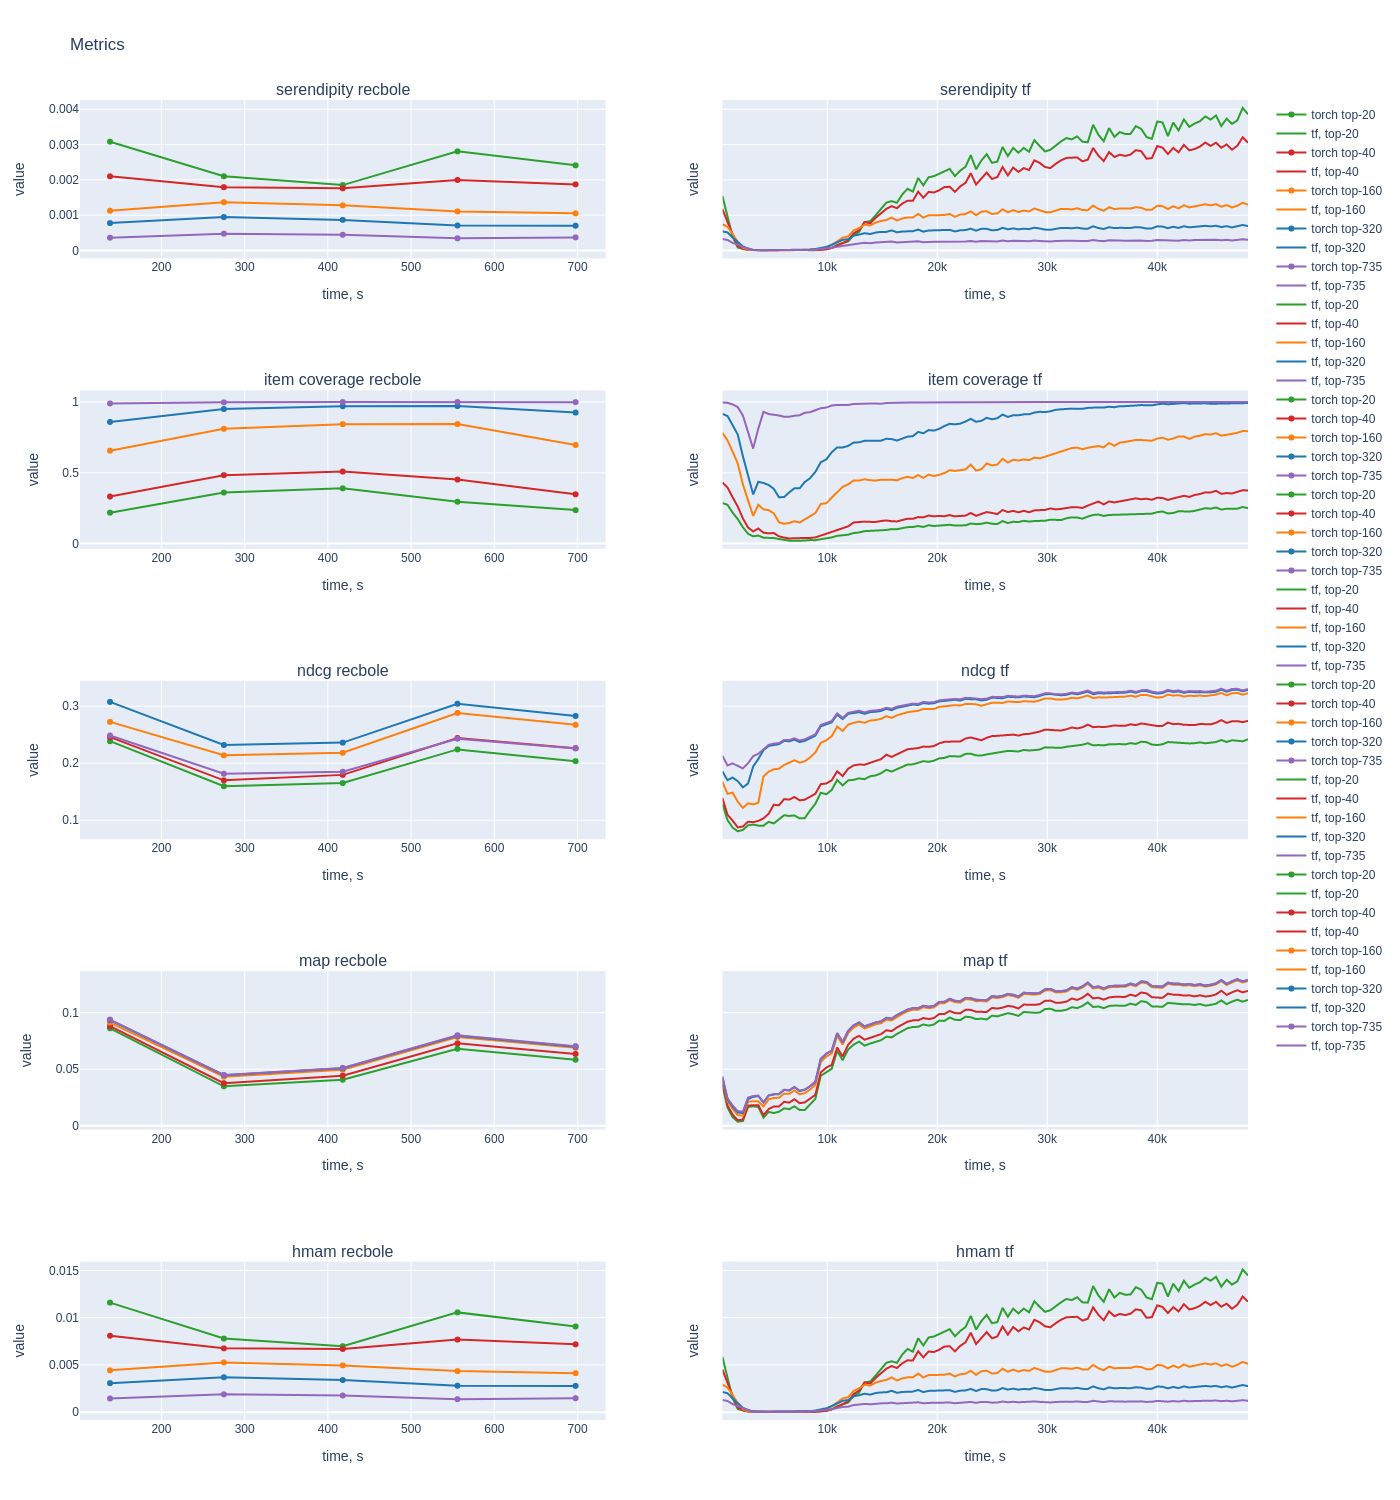

In [18]:
fig = make_subplots(rows=5, cols=2, shared_yaxes=True, subplot_titles=('serendipity recbole', 'serendipity tf',
                                                                       'item coverage recbole', 'item coverage tf',
                                                                       'ndcg recbole', 'ndcg tf',
                                                                       'map recbole', 'map tf',
                                                                       'hmam recbole', 'hmam tf'))

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('serendipity'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=1
        )
    if c2.startswith('serendipity'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('itemcoverage'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=1
        )
    if c2.startswith('coverage'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('ndcg'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=1
        )
    if c2.startswith('ndcg'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('map'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=1
        )
    if c2.startswith('map'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('hmam'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=1
        )
    if c2.startswith('hmam'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=2
        )

fig.update_yaxes(title_text="value")
fig.update_xaxes(title_text="time, s")
fig.update_layout(height=1500, width=1400, title_text="Metrics")
fig.show('png', width=1400, height=1500)